In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [34]:
status = "After"

# Load the data
file_path = f'{status} Graphing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()

,Name,Affiliation,Followers,Date,Likes,Retweets,Replies,Views
0,anthonyzenkus,Democratic Party,88800.0,"April 21, 2024 10:15 PM",1739,68,190,50019
1,anthonyzenkus,Democratic Party,88800.0,"May 15, 2024 08:41 PM",1505,44,619,31610
2,anthonyzenkus,Democratic Party,88800.0,"January 17, 2024 02:22 AM",1305,43,488,16921
3,jimmy_dore,Democratic Party,628500.0,"July 26, 2024 05:56 PM",8554,504,2987,777965
4,jimmy_dore,Democratic Party,628500.0,"May 30, 2024 04:31 AM",1062,85,300,31417


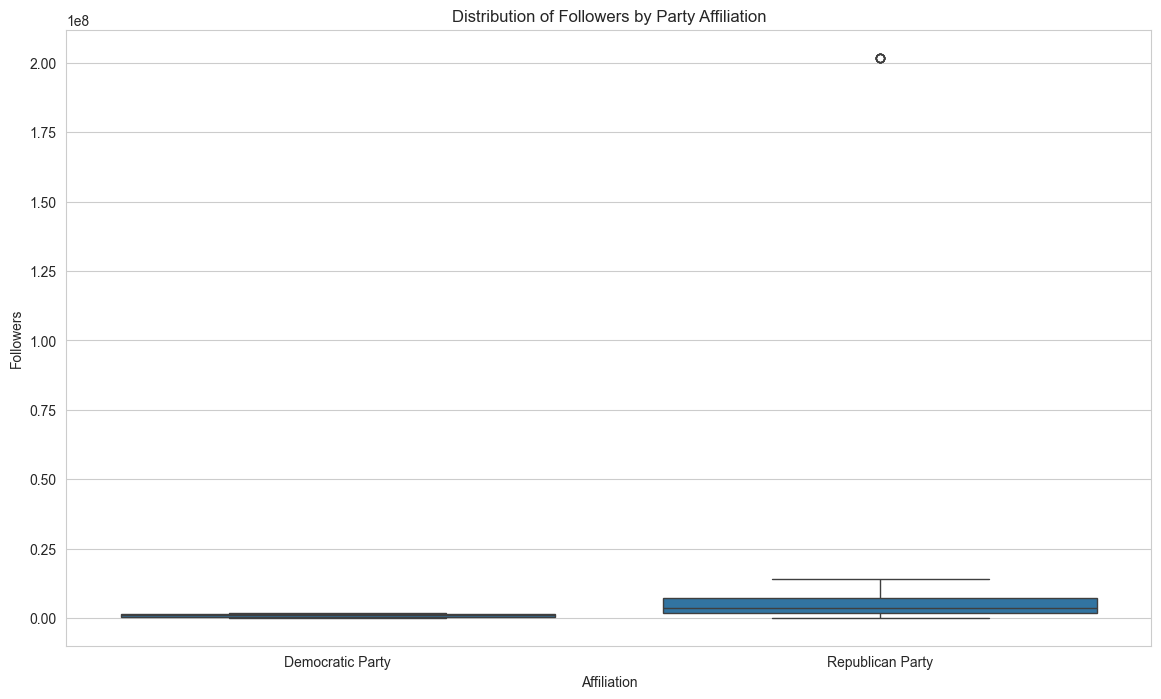

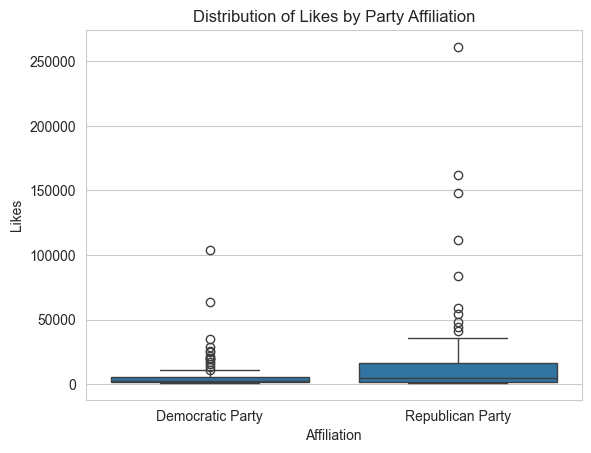

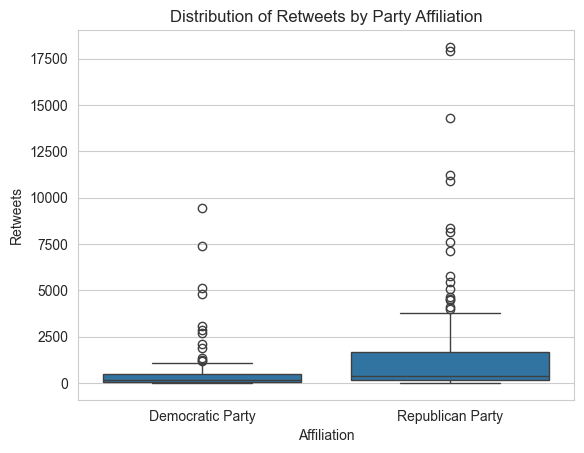

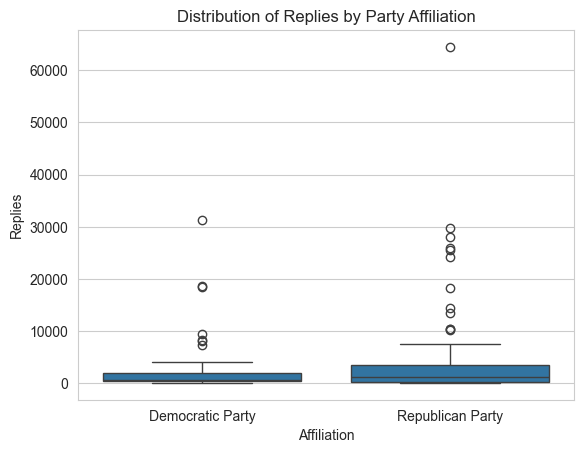

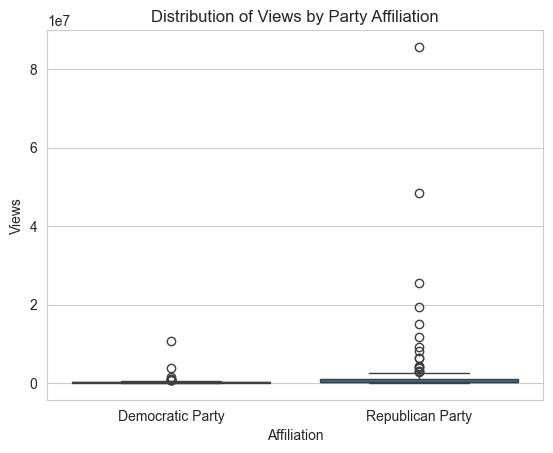

In [35]:
# Set the style for the plots
sns.set_style('whitegrid')

# Convert numeric columns to integers for plotting
data['Followers'] = pd.to_numeric(data['Followers'], errors='coerce')
data['Likes'] = pd.to_numeric(data['Likes'], errors='coerce')
data['Retweets'] = pd.to_numeric(data['Retweets'], errors='coerce')
data['Replies'] = pd.to_numeric(data['Replies'], errors='coerce')
data['Views'] = pd.to_numeric(data['Views'], errors='coerce')

# Filter out the "Other" category
filtered_data = data[data['Affiliation'].isin(['Democratic Party', 'Republican Party'])]

# Plot data by affiliation
plt.figure(figsize=(14, 8))
metrics = ['Followers', 'Likes', 'Retweets', 'Replies', 'Views']
for metric in metrics:
    sns.boxplot(x='Affiliation', y=metric, data=filtered_data)
    plt.title(f'Distribution of {metric} by Party Affiliation')
    plt.show()

In [ ]:
# Filter out the "Other" category
filtered_data = data[data['Affiliation'].isin(['Democratic Party', 'Republican Party'])]


# Clean data: ensure all metric columns have valid numeric values
for metric in metrics:
    filtered_data[metric] = pd.to_numeric(filtered_data[metric], errors='coerce')

# Remove rows with NaN values in any of the metric columns
filtered_data = filtered_data.dropna(subset=metrics)

#Define custom colors
custom_palette = {'Democratic Party': 'dodgerblue', 'Republican Party': 'red'}

# Plot density plots for each metric
for i, metric in enumerate(metrics):
    plt.figure(figsize=(16, 10))
    # plt.subplot(len(metrics), 1, i + 1)
    sns.kdeplot(data=filtered_data, x=metric, hue='Affiliation', fill=True, common_norm=False, alpha=0.5, palette=custom_palette)
    plt.title(f'Density Plot of {metric} by Party Affiliation One Year {status} Oct 7th, 2023')
    plt.xlabel(metric)
    plt.ylabel('Density')
    plt.grid(True) 
    # plt.tight_layout()
    plt.savefig(f'{status}_density_plot_{metric}.png', dpi= 300, bbox_inches='tight') # Save the plot as a PNG file 
    plt.close() 